<a href="https://colab.research.google.com/github/bugssy123/NUMERICAL-AND-SYMBOLICAL-COMPUTATION/blob/main/lab2_titanic_Carza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load the Data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# Display first five rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Understand the Data

In [79]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    category
 2   pclass       891 non-null    category
 3   name         891 non-null    object  
 4   sex          891 non-null    object  
 5   age          891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  embarked     891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

# Step 3: Check for Missing Values

In [83]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


# Step 4: Handle Missing Values

In [104]:
df = df.assign(age=df["age"].fillna(df["age"].median()))


In [102]:
df = df.assign(embarked=df["embarked"].fillna(df["embarked"].mode()[0]))


1. What are your steps in cleaning the dataset? Why did you use these methods?

Answer:
*   Handling Missing Values:
  - Age was filled with the median to prevent outliers from affecting the dataset.
  - Embarked was filled with the mode because it is categorical data.
  - Cabin was dropped since it had too many missing values.

*   Removing Duplicates: Ensured data integrity by checking and removing duplicate records.
*   Fixing Data Types: Converted Survived and Pclass to categorical types for better analysis.

*   Standardizing Column Names: Converted column names to   lowercase for consistency.

Algorithm Choice: This step-by-step approach ensures minimal data loss while maintaining statistical integrity.

# Step 5: Remove Duplicates

In [85]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Step 6: Fix Data Types

In [99]:
# Convert Survived and Pclass to categorical
df["survived"] = df["survived"].astype("category")
df["pclass"] = df["pclass"].astype("category")

# Step 7: Standardize Column Names

In [101]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

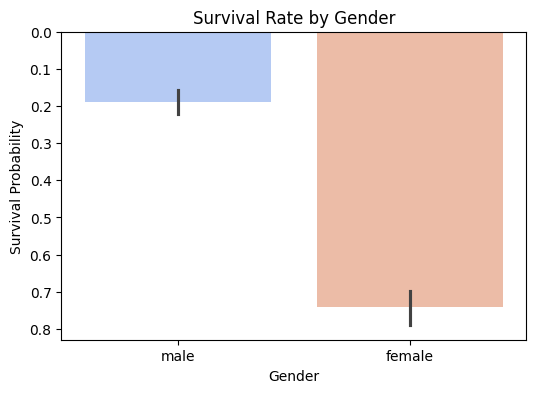

In [59]:
plt.figure(figsize=(6,4))
sns.barplot(x="sex", y="survived", data=df, hue="sex", palette="coolwarm", legend=False)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()


# Women had a higher survival rate than men.

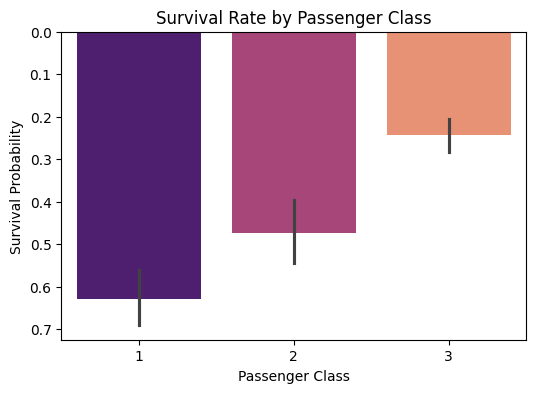

In [58]:
plt.figure(figsize=(6,4))
sns.barplot(x="pclass", y="survived", data=df, hue="pclass", palette="magma", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Probability")
plt.show()


# Higher-class passengers had a greater chance of survival.

In [51]:
df.to_csv("titanic_cleaned.csv", index=False)


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# Display first five rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Bar Plot of Survival Count

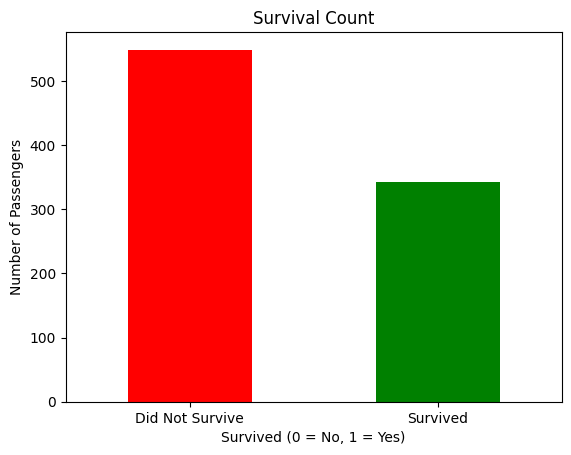

In [54]:
df["survived"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.xticks([0,1], ["Did Not Survive", "Survived"], rotation=0)
plt.show()


# Histogram of Age Distribution

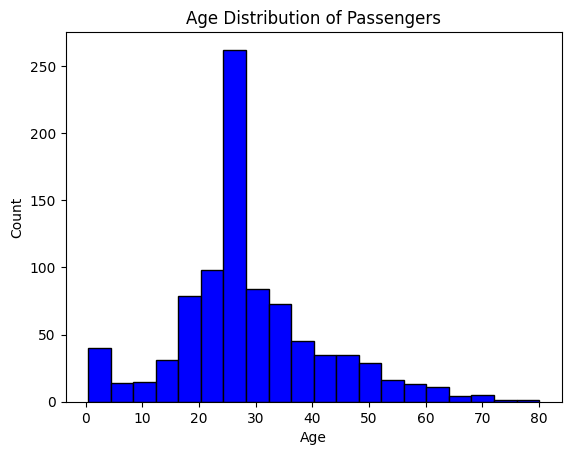

In [55]:
df["age"].plot(kind="hist", bins=20, edgecolor="black", color="blue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# Survival by Gender

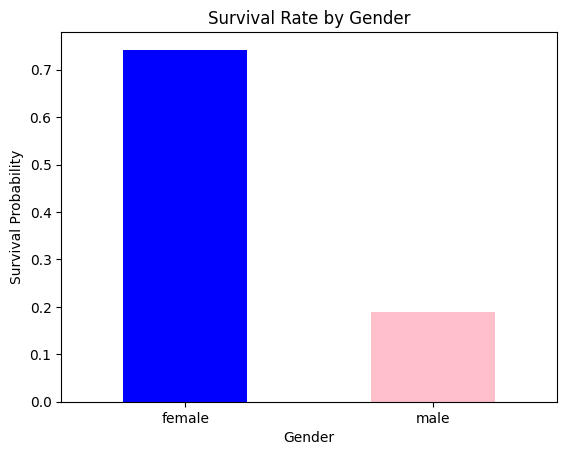

In [57]:
df.groupby("sex")["survived"].apply(lambda x: x.astype(int).mean()).plot(kind="bar", color=["blue", "pink"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()


✅ Most passengers did not survive

✅ The majority of passengers were aged 20-40

✅ Women had a much higher survival rate than men
